## 이론적인 예제

바리어 옵션(Barrier Option)은 기초 자산 가격이 특정 수준(장벽)에 도달했을 때 옵션이 활성화되거나 무효화되는 옵션입니다. 바리어 옵션은 Knock-in 옵션과 Knock-out 옵션으로 나뉩니다.

  - Knock-in Option: 기초 자산 가격이 장벽에 도달하면 옵션이 활성화됩니다.
  - Knock-out Option: 기초 자산 가격이 장벽에 도달하면 옵션이 무효화됩니다.

Knock-in Call Option Price: 50.56
Knock-out Call Option Price: 50.56


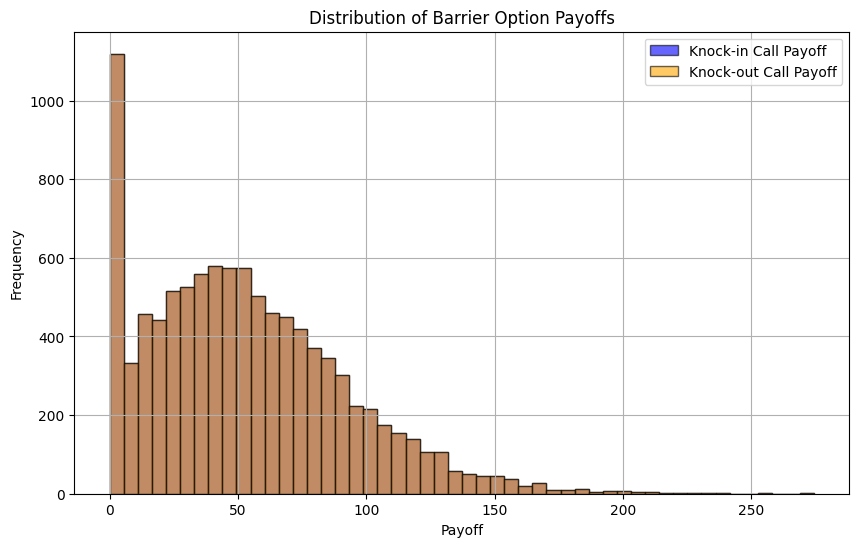

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

def simulate_stock_paths(S0, r, sigma, T, M, I):
    """
    주식 가격 경로 시뮬레이션 함수

    Parameters:
    S0: 초기 주식 가격
    r: 무위험 이자율
    sigma: 변동성
    T: 만기 시간 (단위: 년)
    M: 기간 수 (단위: 일)
    I: 시뮬레이션 수

    Returns:
    주식 가격 경로 배열 (I x M)
    """
    dt = T / M
    paths = np.zeros((I, M + 1))
    paths[:, 0] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal(I)
        paths[:, t] = paths[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    return paths

def barrier_option_payoff(paths, K, barrier, option_type="call", barrier_type="knock-in"):
    """
    바리어 옵션의 페이오프 계산 함수

    Parameters:
    paths: 주식 가격 경로 배열 (I x M)
    K: 행사가격
    barrier: 장벽 가격
    option_type: "call" 또는 "put"
    barrier_type: "knock-in" 또는 "knock-out"

    Returns:
    바리어 옵션의 페이오프 배열
    """
    if barrier_type == "knock-in":
        activated = np.any(paths >= barrier, axis=1) if option_type == "call" else np.any(paths <= barrier, axis=1)
    elif barrier_type == "knock-out":
        activated = np.all(paths < barrier, axis=1) if option_type == "call" else np.all(paths > barrier, axis=1)
    else:
        raise ValueError("barrier_type must be 'knock-in' or 'knock-out'")

    if option_type == "call":
        payoff = np.maximum(paths[:, -1] - K, 0)
    elif option_type == "put":
        payoff = np.maximum(K - paths[:, -1], 0)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    if barrier_type == "knock-in":
        payoff *= activated
    elif barrier_type == "knock-out":
        payoff *= ~activated

    return payoff


# 주식 가격 경로 시뮬레이션
paths = simulate_stock_paths(S0, r, sigma, T, M, I)

# 바리어 옵션 페이오프 계산
knock_in_payoff = barrier_option_payoff(paths, K, barrier, option_type="call", barrier_type="knock-in")
knock_out_payoff = barrier_option_payoff(paths, K, barrier, option_type="call", barrier_type="knock-out")

# 바리어 옵션 가격 계산 (할인된 페이오프 평균)
knock_in_price = np.exp(-r * T) * np.mean(knock_in_payoff)
knock_out_price = np.exp(-r * T) * np.mean(knock_out_payoff)
print(f"Knock-in Call Option Price: {knock_in_price:.2f}")
print(f"Knock-out Call Option Price: {knock_out_price:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(knock_in_payoff, bins=50, alpha=0.6, label='Knock-in Call Payoff', color='blue', edgecolor='black')
plt.hist(knock_out_payoff, bins=50, alpha=0.6, label='Knock-out Call Payoff', color='orange', edgecolor='black')
plt.title('Distribution of Barrier Option Payoffs')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


## 실제 데이터 활용

[*********************100%%**********************]  1 of 1 completed


Knock-in Call Option Price: 50.80
Knock-out Call Option Price: 0.00


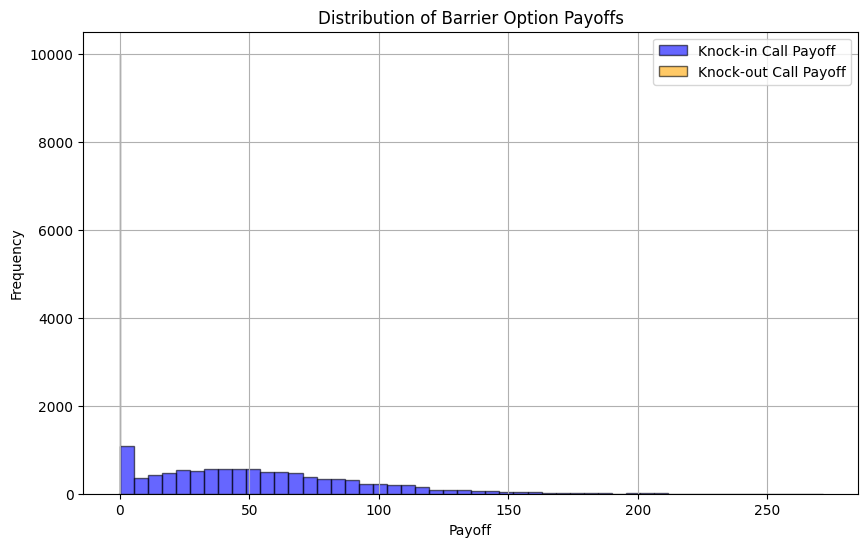

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

def simulate_stock_paths(S0, r, sigma, T, M, I):
    """
    주식 가격 경로 시뮬레이션 함수

    Parameters:
    S0: 초기 주식 가격
    r: 무위험 이자율
    sigma: 변동성
    T: 만기 시간 (단위: 년)
    M: 기간 수 (단위: 일)
    I: 시뮬레이션 수

    Returns:
    주식 가격 경로 배열 (I x M)
    """
    dt = T / M
    paths = np.zeros((I, M + 1))
    paths[:, 0] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal(I)
        paths[:, t] = paths[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    return paths

def barrier_option_payoff(paths, K, barrier, option_type="call", barrier_type="knock-in"):
    """
    바리어 옵션의 페이오프 계산 함수

    Parameters:
    paths: 주식 가격 경로 배열 (I x M)
    K: 행사가격
    barrier: 장벽 가격
    option_type: "call" 또는 "put"
    barrier_type: "knock-in" 또는 "knock-out"

    Returns:
    바리어 옵션의 페이오프 배열
    """
    if option_type == "call":
        if barrier_type == "knock-in":
            activated = np.any(paths >= barrier, axis=1)
        elif barrier_type == "knock-out":
            activated = ~np.any(paths >= barrier, axis=1)
        payoff = np.maximum(paths[:, -1] - K, 0)
    elif option_type == "put":
        if barrier_type == "knock-in":
            activated = np.any(paths <= barrier, axis=1)
        elif barrier_type == "knock-out":
            activated = ~np.any(paths <= barrier, axis=1)
        payoff = np.maximum(K - paths[:, -1], 0)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    payoff *= activated
    return payoff

# yfinance를 사용하여 데이터 다운로드
ticker = 'AAPL'
data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
S0 = data['Close'][-1]  # 초기 주식 가격 (가장 최근 종가)
K = 150  # 행사가격
barrier = 160  # 장벽 가격
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성
T = 1  # 만기 시간 (1년)
M = len(data)  # 실제 데이터의 기간 수
I = 10000  # 시뮬레이션 수

# 주식 가격 경로 시뮬레이션
paths = simulate_stock_paths(S0, r, sigma, T, M, I)

# 바리어 옵션 페이오프 계산
knock_in_payoff = barrier_option_payoff(paths, K, barrier, option_type="call", barrier_type="knock-in")
knock_out_payoff = barrier_option_payoff(paths, K, barrier, option_type="call", barrier_type="knock-out")

# 바리어 옵션 가격 계산 (할인된 페이오프 평균)
knock_in_price = np.exp(-r * T) * np.mean(knock_in_payoff)
knock_out_price = np.exp(-r * T) * np.mean(knock_out_payoff)
print(f"Knock-in Call Option Price: {knock_in_price:.2f}")
print(f"Knock-out Call Option Price: {knock_out_price:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(knock_in_payoff, bins=50, alpha=0.6, label='Knock-in Call Payoff', color='blue', edgecolor='black')
plt.hist(knock_out_payoff, bins=50, alpha=0.6, label='Knock-out Call Payoff', color='orange', edgecolor='black')
plt.title('Distribution of Barrier Option Payoffs')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
